In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def assignment(data):
    x = [data.Location,data.Fuel_Type,data.Transmission,data.Owner_Type,data.Kilometers_Driven,data.Engine,data.Power,data.Seats,data.Year,data.Mileage]
    y = [data.Price]
    return x,y

In [3]:
def cost(ypred,y):
    cost = 0
    for i in range (len(ypred)):
        cost += (ypred[i]-y.iloc[i])**2
    cost = cost/(len(y))
    cost = cost**(0.5)
    return cost

In [4]:
def r2score(y, ypred):
    mean = y.mean()
    num = 0
    den = 0
    for i in range(len(ypred)):
        num += (ypred[i]-y.iloc[i])**2
        den += (y.iloc[i]-mean)**2
    accuracy = 1 - num/den
    #print(mean,num,den)
    return accuracy*100

In [5]:
data = pd.read_csv("train.csv")
'''
city = {"Hyderabad":1,"Kochi":2,"Mumbai":3,"Jaipur":4,"Pune":5,"Kolkata":6,"Coimbatore":7,"Bangalore":8,"Delhi":9,"Chennai":10,"Ahmedabad":11}
data['Location'] = data['Location'].map(city)

fuel = {"Petrol":1,"Diesel":2,"Electric":3}
data['Fuel_Type'] = data['Fuel_Type'].map(fuel)

owner = {"First":2,"Second":1}
data["Owner_Type"]= data["Owner_Type"].map(owner)

transmission = {"Automatic":1,"Manual":2}
data["Transmission"]= data["Transmission"].map(transmission)
'''
data['Mileage'] = data['Mileage'].str.replace(' kmpl', '').astype(float)
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)
data['Power'] = data['Power'].replace("null",np.nan)
data['Power'] = data['Power'].fillna('0 bhp')
data['Power'] = data['Power'].str.replace('null', '0')
data['Power'] = data['Power'].str.replace(' bhp', '').astype(float)

In [6]:
dummiescity = pd.get_dummies(data.Location)
dummiesowner = pd.get_dummies(data.Owner_Type)
dummiestrans = pd.get_dummies(data.Transmission)
dummiesfuel = pd.get_dummies(data.Fuel_Type)

In [7]:
mergedfinal = pd.concat([dummiescity,dummiesowner,dummiestrans,dummiesfuel],axis = 'columns')
mergedfinal = mergedfinal.drop(['Manual','Pune','Electric','First'],axis = 1)

In [8]:
mergedfinal = mergedfinal.astype(int)

In [9]:
data2 = pd.concat([data,mergedfinal],axis = 1)
data2 = data2.drop(['Name','Location','Owner_Type','Transmission','Fuel_Type'],axis = 1)
datacorr = data2.corr()
print(datacorr['Price'])

Unnamed: 0           0.005215
Year                 0.311836
Kilometers_Driven   -0.161540
Mileage             -0.296911
Engine               0.650331
Power                0.739651
Seats                0.052601
Price                1.000000
Ahmedabad           -0.026599
Bangalore            0.091288
Chennai             -0.058011
Coimbatore           0.183106
Delhi               -0.023570
Hyderabad            0.011948
Jaipur              -0.105221
Kochi                0.063392
Kolkata             -0.092894
Mumbai               0.010867
Fourth & Above      -0.021046
Second              -0.072289
Third               -0.064043
Automatic            0.587183
Diesel               0.320801
Petrol              -0.320979
Name: Price, dtype: float64


In [10]:
feature_columns = ['Year', 'Mileage', 'Engine', 'Power','Kilometers_Driven','Seats','Price']
X = data[feature_columns]
X = pd.concat([X,mergedfinal],axis='columns')
X = X.reset_index(drop=True)

In [11]:
X=X.dropna()
y = X['Price']
X = X.drop(['Price'],axis = 1)
y = y.dropna()
X

,Year,Mileage,Engine,Power,Kilometers_Driven,Seats,Ahmedabad,Bangalore,Chennai,Coimbatore,...,Jaipur,Kochi,Kolkata,Mumbai,Fourth & Above,Second,Third,Automatic,Diesel,Petrol
0,2017,23.84,1199.0,84.00,16500,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2017,18.49,1493.0,100.00,47357,7.0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,2014,15.00,1598.0,103.52,35000,5.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2007,17.20,1396.0,53.50,200000,5.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,2013,21.02,1248.0,88.76,64000,5.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,11.00,2993.0,235.00,150000,5.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3746,2012,11.79,2179.0,120.00,85000,7.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3747,2007,18.90,998.0,67.10,55100,5.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3748,2014,20.45,1461.0,83.80,77500,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X = (X - X.mean()) / X.std()

In [13]:
null_counts = X.isnull().sum()
print(null_counts)

Year                 0
Mileage              0
Engine               0
Power                0
Kilometers_Driven    0
Seats                0
Ahmedabad            0
Bangalore            0
Chennai              0
Coimbatore           0
Delhi                0
Hyderabad            0
Jaipur               0
Kochi                0
Kolkata              0
Mumbai               0
Fourth & Above       0
Second               0
Third                0
Automatic            0
Diesel               0
Petrol               0
dtype: int64


In [14]:
y = (y - y.mean()) / y.std()

In [15]:
def gradient_descent(X, b, alpha,iterations,y):
    samples, columns = X.shape
    w = np.zeros(columns)
    costl = []
    for k in range(iterations):
        dw = np.zeros(columns)
        db = 0
        yp = []
        for i in range(samples):
            ypred =0 
            for j in range(columns):
                ypred += w[j]*X.iloc[i,j]
                #print(X.iloc[i,j])
            ypred+=b
            db+=  (ypred-y.iloc[i])/samples
            for j in range(columns):
                dw[j] += X.iloc[i,j]*(ypred-y.iloc[i])/samples
            yp.append(ypred)
        for j in range(columns):
                w[j]= w[j]-alpha*dw[j]
        b=b-alpha*db
        costi = cost(yp,y)
        costl.append(costi)
        print("Epoch: ",k+1," Accuracy: ",r2score(y,yp),"%")
    return w,b,costl

In [16]:
w,b,yaxis=gradient_descent(X,0,0.5,20,y)
print(w)
print(b)

Epoch:  1  Accuracy:  0.0 %
Epoch:  2  Accuracy:  48.8962692969092 %
Epoch:  3  Accuracy:  60.59527785389414 %
Epoch:  4  Accuracy:  65.25218231118883 %
Epoch:  5  Accuracy:  67.1734707036846 %
Epoch:  6  Accuracy:  67.99698617841163 %
Epoch:  7  Accuracy:  68.36779164153407 %
Epoch:  8  Accuracy:  68.54582986319808 %
Epoch:  9  Accuracy:  68.63825999321793 %
Epoch:  10  Accuracy:  68.69052147571635 %
Epoch:  11  Accuracy:  68.72262850845306 %
Epoch:  12  Accuracy:  68.74385101984855 %
Epoch:  13  Accuracy:  68.75875615455803 %
Epoch:  14  Accuracy:  68.7697532007936 %
Epoch:  15  Accuracy:  68.77820143407753 %
Epoch:  16  Accuracy:  68.78491443454044 %
Epoch:  17  Accuracy:  68.79040299590491 %
Epoch:  18  Accuracy:  68.7949998872321 %
Epoch:  19  Accuracy:  68.79892822836067 %
Epoch:  20  Accuracy:  68.80234120661261 %
[ 0.25444597 -0.1080216   0.20596203  0.39930245 -0.10043199 -0.1164698
 -0.01357348  0.0311234   0.0166692   0.04522327 -0.03506348  0.05323436
  0.01031394 -0.004195

In [17]:
'''
Accuracy (after 100 epochs): 68.83679589583068 %
weights: [ 0.25511102 -0.12142705  0.16201973  0.43499162 -0.09931619 -0.11092094
 -0.01516588  0.02884204  0.01496301  0.04225863 -0.03745231  0.05131236
  0.0080379  -0.00703111 -0.04909456 -0.04732766 -0.00461861 -0.0175275
  0.00679755  0.1204221   0.06801955 -0.06801955]
Bias: 4.131889397144574e-15
'''


'\nAccuracy (after 100 epochs): 68.83679589583068 %\nweights: [ 0.25511102 -0.12142705  0.16201973  0.43499162 -0.09931619 -0.11092094\n -0.01516588  0.02884204  0.01496301  0.04225863 -0.03745231  0.05131236\n  0.0080379  -0.00703111 -0.04909456 -0.04732766 -0.00461861 -0.0175275\n  0.00679755  0.1204221   0.06801955 -0.06801955]\nBias: 4.131889397144574e-15\n'

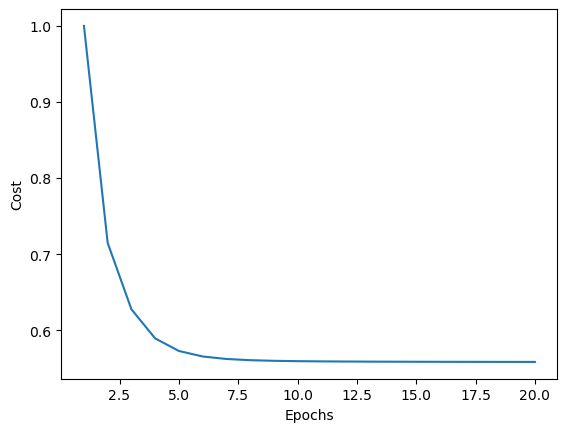

In [18]:
xaxis = list(range(1, len(yaxis)+1))
plt.plot(xaxis,yaxis)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [19]:
testdata = pd.read_csv("test.csv")

'''city = {"Hyderabad":1,"Kochi":2,"Mumbai":3,"Jaipur":4,"Pune":5,"Kolkata":6,"Coimbatore":7,"Bangalore":8,"Delhi":9,"Chennai":10,"Ahmedabad":11}
data['Location'] = data['Location'].map(city)

fuel = {"Petrol":1,"Diesel":2}
data['Fuel_Type'] = data['Fuel_Type'].map(fuel)

owner = {"First":2,"Second":1}
data["Owner_Type"]= data["Owner_Type"].map(owner)

transmission = {"Automatic":1,"Manual":2}
data["Transmission"]= data["Transmission"].map(transmission)'''

testdata['Mileage'] = testdata['Mileage'].str.replace(' kmpl', '').astype(float)
testdata['Engine'] = testdata['Engine'].str.replace(' CC', '').astype(float)
testdata['Power'] = testdata['Power'].replace("null",np.nan)
testdata['Power'] = testdata['Power'].fillna('0 bhp')
testdata['Power'] = testdata['Power'].str.replace('null', '0')
testdata['Power'] = testdata['Power'].str.replace(' bhp', '').astype(float)

In [20]:
dummiescity = pd.get_dummies(testdata.Location)
dummiesowner = pd.get_dummies(testdata.Owner_Type)
dummiestrans = pd.get_dummies(testdata.Transmission)
dummiesfuel = pd.get_dummies(testdata.Fuel_Type)

In [21]:
testmergedfinal = pd.concat([dummiescity,dummiesowner,dummiestrans,dummiesfuel],axis = 'columns')
testmergedfinal = testmergedfinal.drop(['Manual','Pune','Electric','First'],axis = 1)

In [22]:
testmergedfinal = testmergedfinal.astype(int)

In [23]:
feature_columns = ['Year', 'Mileage', 'Engine', 'Power','Kilometers_Driven','Seats','Price']
testX = testdata[feature_columns]
testX = pd.concat([testX,testmergedfinal],axis='columns')
testX = testX.reset_index(drop=True)

In [24]:
testX=testX.dropna()
testy = testX['Price']
testX = testX.drop(['Price'],axis = 1)
testy = testy.dropna()

In [25]:
testX = (testX - testX.mean()) / testX.std()

In [26]:
testy = (testy - testy.mean()) / testy.std()

In [27]:
def pred(x,y,w,b):
    samples, columns = x.shape
    cost = 0
    ypred = []
    for i in range(samples):
        yp = 0
        for j in range(columns):
            yp += x.iloc[i,j]*w[j]+b
        cost += (yp-y.iloc[i])**(2)
        ypred.append(yp)
    cost = cost/samples
    cost = cost**(0.5)
    return cost, r2score(y,ypred)

In [28]:
cost, accuracy = pred(testX,testy,w,b)
print("Cost:",cost)
print("Accuracy:"+str(accuracy)+'%')

Cost: 0.5846110521266803
Accuracy:65.79545187931657%


In [29]:
#Test Accuracy: 65.8%